### 🧾 Dataset 1: Nobel Prize Winners (JSON Format)

***GOOGLE DRIVE LINK TO DATA FILES : https://drive.google.com/drive/folders/1z4QGwJ1VAj3nLs6ICE1h6cRKF7CpLy-i?usp=share_link***

**🔗 Source:**  
The dataset was sourced from the [Nobel Prize official JSON archive](http://api.nobelprize.org/v1/laureate.json), which provides semi structured data on all Nobel laureates including their biographical details, award years, categories, motivations, and affiliations.


**📂 General Characteristics of Dataset 1:**  
- **Format:** The file is in JSON format. Each top-level object represents a Nobel laureate. Inside each laureate entry:
- The `prizes` field is a list of prize objects received.
- Each prize may contain an `affiliations` list with nested dictionaries specifying the institution name, city, and country.
This nested structure needs to be flattened for easier analysis and merging with other datasets.
- **Structure:**  
  - Top-level key: `laureates` (list of laureate dictionaries)
  - Each laureate: personal info + list of `prizes`
  - Each prize: info + list of `affiliations` (institutions)
- **Fields:**  
  - Laureate: id, firstname, surname, born, died, bornCountry, bornCity, diedCountry, diedCity, gender, etc.
  - Prize: year, category, share, motivation, affiliations
  - Affiliation: name, city, country
- **Records:**  
  - ~1000 laureates, each with 1+ prizes, each with 0+ affiliations

**Initial Audit:**  
- Nested structure: prizes and affiliations are lists within each laureate.
- Some prizes have no affiliations (e.g., individual awards).
- Some fields are missing or null for certain laureates.
- Country names are not standardized (e.g., "USA" vs "United States").
- Data is not in a flat, tabular format suitable for analysis.


**🛠️ Wrangling and Transformation Process:**  
1. The JSON file was loaded using Python’s built-in `json` library.
2. Each laureate was iterated through, and all prize records were extracted.
3. Two cases were handled during extraction:
   - If affiliations were **missing or malformed**, we still captured all main prize and personal data but set affiliation fields to `None`.
   - If affiliations were **valid**, we extracted and flattened each affiliation record along with its associated prize and laureate metadata.
4. A list of flattened records was converted to a pandas DataFrame.
5. The final structured dataset was exported to Excel for further analysis.

**📤 Output:**  
The resulting Excel file is named **`Nobel_Laureates_Flat.xlsx`**, which will be used as Dataset 1 for further merging and analysis.

**🧪 Quick Audit:**
- The dataset has a clear structure after flattening.
- Some affiliation data is missing or incomplete, but handled using null values.
- The format is now clean and analysis-ready.


In [ ]:
import json
import sys
!{sys.executable} -m pip install openpyxl

import pandas as pd
 
# Step 1: Load the JSON data
with open("Nobel_laureate.json", 'r', encoding='utf-8') as read_file:
    data = json.load(read_file)
 
# Step 2: Extract the list of laureates
laureates = data['laureates']
records = []
 
# Step 3: Process each laureate and their prizes
for laureate in laureates:
    for prize in laureate.get('prizes', []):
        affiliations = prize.get('affiliations', [])
       
        # Case 1: Empty or malformed affiliations
        if not affiliations or not isinstance(affiliations, list) or not any(isinstance(a, dict) for a in affiliations):
            records.append({
                'id': laureate.get('id'),
                'firstname': laureate.get('firstname'),
                'surname': laureate.get('surname'),
                'born': laureate.get('born'),
                'died': laureate.get('died'),
                'bornCountry': laureate.get('bornCountry'),
                'bornCity': laureate.get('bornCity'),
                'diedCountry': laureate.get('diedCountry'),
                'diedCity': laureate.get('diedCity'),
                'gender': laureate.get('gender'),
                'prize_year': prize.get('year'),
                'category': prize.get('category'),
                'share': prize.get('share'),
                'motivation': prize.get('motivation'),
                'affiliation_name': None,
                'affiliation_city': None,
                'affiliation_country': None,
            })
        else:
            # Case 2: Valid affiliation dictionaries
            for aff in affiliations:
                if isinstance(aff, dict):  # Safeguard
                    records.append({
                        'id': laureate.get('id'),
                        'firstname': laureate.get('firstname'),
                        'surname': laureate.get('surname'),
                        'born': laureate.get('born'),
                        'died': laureate.get('died'),
                        'bornCountry': laureate.get('bornCountry'),
                        'bornCity': laureate.get('bornCity'),
                        'diedCountry': laureate.get('diedCountry'),
                        'diedCity': laureate.get('diedCity'),
                        'gender': laureate.get('gender'),
                        'prize_year': prize.get('year'),
                        'category': prize.get('category'),
                        'share': prize.get('share'),
                        'motivation': prize.get('motivation'),
                        'affiliation_name': aff.get('name'),
                        'affiliation_city': aff.get('city'),
                        'affiliation_country': aff.get('country'),
                    })
# Step 4: Convert to DataFrame and export to Excel
df = pd.DataFrame(records)
df.to_excel("Nobel_Laureates_Flat.xlsx", index=False)
print("✅ Excel file 'Nobel_Laureates_Flattened.xlsx' created successfully.")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
✅ Excel file 'Nobel_Laureates_Flattened.xlsx' created successfully.


#### 🧾 Preview of Flattened Nobel Laureates Dataset

To inspect the output of our wrangling process, we used the `df.head()` command to display the first few rows of the resulting DataFrame. This gives us a quick look at the structure and verifies that the flattening and extraction were successful.

Below is a preview of the dataset:


In [ ]:
df.head()  # Display the first few rows of the DataFrame


,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,prize_year,category,share,motivation,affiliation_name,affiliation_city,affiliation_country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Lennep (now Remscheid),Germany,Munich,male,1901,physics,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,Arnhem,the Netherlands,None,male,1902,physics,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,Zonnemaire,the Netherlands,Amsterdam,male,1902,physics,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,Paris,France,None,male,1903,physics,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,Paris,France,Paris,male,1903,physics,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


This dataset currently contains **X rows and Y columns**, indicating a rich set of records for analysis.


#### 📆 Filtering for 21st-Century Laureates (Post-2000)

To narrow down our analysis to more **recent Nobel Prize winners**, we filtered the dataset to only include records where the prize year is **after 2000**.

This helps us:
- Focus on modern developments and recent Nobel trends.
- Make the analysis more relevant to contemporary global dynamics.
- Ensure better data completeness and digital recording standards.

```python
df_recent = df[df['prize_year'].astype(int) > 2000]


In [ ]:
df_recent = df[df['prize_year'].astype(int) > 2000]
df_recent.head()

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,prize_year,category,share,motivation,affiliation_name,affiliation_city,affiliation_country
746,735,Leland,Hartwell,1939-10-30,0000-00-00,USA,"Los Angeles, CA",None,None,male,2001,medicine,3,"""for their discoveries of key regulators of th...",Fred Hutchinson Cancer Research Center,"Seattle, WA",USA
747,736,Tim,Hunt,1943-02-19,0000-00-00,United Kingdom,Neston,None,None,male,2001,medicine,3,"""for their discoveries of key regulators of th...",Imperial Cancer Research Fund,London,United Kingdom
748,737,Sir Paul,Nurse,1949-01-25,0000-00-00,United Kingdom,Norwich,None,None,male,2001,medicine,3,"""for their discoveries of key regulators of th...",Imperial Cancer Research Fund,London,United Kingdom
749,738,Eric,Cornell,1961-12-19,0000-00-00,USA,"Palo Alto, CA",None,None,male,2001,physics,3,"""for the achievement of Bose-Einstein condensa...","University of Colorado, JILA","Boulder, CO",USA
750,739,Wolfgang,Ketterle,1957-10-21,0000-00-00,West Germany (now Germany),Heidelberg,None,None,male,2001,physics,3,"""for the achievement of Bose-Einstein condensa...",Massachusetts Institute of Technology (MIT),"Cambridge, MA",USA


This filtered dataset contains **___ records**, representing Nobel Prizes awarded from the year 2001 onwards.


#### 📊 Dataset Size After Filtering

To understand the size of our filtered dataset (Nobel laureates post-2000), we used the `.shape` attribute. This returns a tuple in the format:

`(number of rows, number of columns)`

This helps us verify how many recent records we retained for further analysis.


In [ ]:
df_recent.shape  # Display the shape of the filtered DataFrame



(349, 17)

➡️ The filtered dataset contains **400 records and 17 columns**.


#### 🎯 Focusing on Key Nobel Categories & Handling Missing Data

To align our analysis with Nobel fields most associated with scientific and economic progress, we filtered the dataset to retain only the following categories:

- Physics  
- Chemistry  
- Medicine  
- Economics

*Note: Imputed missing values of affiliation country as the born country*


In [ ]:
# Filter for specific categories
categories = ['physics', 'chemistry', 'medicine', 'economics']
df_recent_filtered = df_recent[df_recent['category'].isin(categories)].copy()

# Replace blank or missing affiliation_country with bornCountry
df_recent_filtered['affiliation_country'] = df_recent_filtered['affiliation_country'].fillna(df_recent_filtered['bornCountry'])

df_recent_filtered.shape
df_recent_filtered.to_excel("Nobel_Laureates_Filtered.xlsx", index=False)


### ❓ Question 1: Which countries have produced the most Nobel laureates (since 2001) in science and economics?

To answer this question, we grouped the filtered Nobel dataset by `affiliation_country` and counted the number of **unique laureates** from each country using the `id` field.


In [ ]:
nobel_counts_by_country = df_recent_filtered.groupby('affiliation_country')['id'].nunique().reset_index(name='laureate_count')
nobel_counts_by_country = nobel_counts_by_country.sort_values('laureate_count', ascending=False)
nobel_counts_by_country

,affiliation_country,laureate_count
16,USA,155
17,United Kingdom,22
11,Japan,15
7,Germany,12
6,France,11
9,Israel,5
3,Canada,4
15,Switzerland,4
0,Australia,3
12,Norway,2


### 🔗 Dataset 2: National Indicators (CSV, Multiple Files)
#### Combining and Loading the Combined Dataset (MERGED.csv)
**Surce:**  
- Source: World Bank, UNDP.
- Files:  
  - `GDP per Capita.csv`, `Educational attainment-Bachelor.csv`,'HDI.csv', `Educational attainment-Master.csv`, `Educational attainment-Doctoral.csv`, `GDP.csv`, `GDP growth rate.csv`, `Patent applications-residents.csv`, `R&D Expenditure.csv`, `Articles.csv`

Links to Dataset:
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
https://data.worldbank.org/indicator/SE.TER.CUAT.DO.ZS
https://data.worldbank.org/indicator/SE.TER.CUAT.MS.ZS
https://data.worldbank.org/indicator/SE.TER.CUAT.BA.ZS
https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS
https://data.worldbank.org/indicator/IP.PAT.RESD
https://data.worldbank.org/indicator/IP.JRN.ARTC.SC

**General Characteristics:**  
- **Format:** CSV (wide format, years as columns)
- **Structure:**  
  - Columns: Country Name, Country Code, Indicator Name, Indicator Code, 2001, 2002, ..., 2022
  - Each file contains one indicator for all countries and years.
- **Records:**  
  - Each file: ~200 countries × 22 years = ~4400 rows per file

**Initial Audit:**  
- Wide format: years as columns, not suitable for merging.
- Some missing values for certain countries/years.
- Country names may not match Nobel data (e.g., "United States" vs "USA").
- Some files have inconsistent naming or extra columns.

**Wrangling Steps:**  
- **Reshaping:**  
  - Used `pd.melt` to convert from wide to long format (one row per country-year).
  - Renamed value columns to meaningful names (e.g., "GDP_per_capita(US$)").
  - Dropped unnecessary columns.
  - Filtered for years >= 2001.
- **Python Code Example:**
    ```python
    df1 = pd.read_csv("GDP per Caipta.csv")
    df1_filtered = (
        df1.melt(
            id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
            var_name="Year",
            value_name="GDP_per_capita(US$)"
        )
        .assign(Year=lambda x: pd.to_numeric(x["Year"], errors='coerce'))
        .drop(columns=["Indicator Code", "Indicator Name"])
        .query("Year >= 2001")
    )
    df1_filtered.to_csv("GDP per Capita Flat.csv", index = False)
 
- **Repeat:**  
  -The above process was repeated for each indicator file, changing the value column name as appropriate.
**Steps to Combine:**
- **Merge All Indicators:**  
  - Loaded all reshaped indicator files into DataFrames.
  - Merged them on `Country Name`, `Country Code`, and `Year` using left joins.
  - Result: a single DataFrame with all KPIs for each country-year.
- **Python Code:**
 ```python
    file_paths = {
        "bachelor": "Educational attainment-Bachelor Flat.csv",
        "master": "Educational attainment-Master Flat.csv",
        "doctoral": "Educational attainment-Doctoral Flat.csv",
        "gdp": "GDP flat.csv",
        "gdp_growth": "GDP growth rate flat.csv",
        "gdp_per_capita": "GDP per Capita Flat.csv",
        "journal": "Journal flat.csv",
        "patent": "Patent applications-residents flat.csv",
        "rnd": "R&D Expenditure flat.csv"
    }
    dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}
    merged_df = dfs["gdp_per_capita"]
    for name, df in dfs.items():
        if name != "gdp_per_capita":
            merged_df = pd.merge(merged_df, df, on=["Country Name", "Country Code", "Year"], how="left")
    merged_df.to_csv("merged.csv", index=False)
    ```

In below step, we loaded the merged dataset created by combining the Nobel laureates data with another external dataset (e.g., Human Development Index, R&D Spending, QS University Rankings, etc.).

This combined dataset enables us to perform **multi-variable analysis** and explore relationships across:
- Nobel laureate counts,
- Socio-economic indicators,
- Global university performance,
- or other relevant national metrics.
...



In [ ]:
import pandas as pd
import os
merged_df = pd.read_csv("Imp Datasets/MERGED.csv")
merged_df.head()


,Country Name,Country Code,Year,GDP_per_capita(US$),Bachelors and above,Masters and above,Doctorals and above,GDP(US$),GDP growth rate(%),No. Journals,No.Patent Applications,R&D Expenditure (% of GDP)
0,Aruba,ABW,2001,20740.132580,NaN,NaN,NaN,1.896457e+09,4.182002,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,2001,626.169148,NaN,NaN,NaN,2.609920e+11,3.505726,5746.208384,NaN,NaN
2,Afghanistan,AFG,2001,138.706822,NaN,NaN,NaN,2.813572e+09,-9.431974,1.000000,NaN,NaN
3,Africa Western and Central,AFW,2001,530.653167,NaN,NaN,NaN,1.500580e+11,5.172056,1868.875348,NaN,NaN
4,Angola,AGO,2001,533.586202,NaN,NaN,NaN,8.936079e+09,4.205999,9.580000,NaN,NaN


### 🌍 Standardizing Country Names for Comparison

Since our Nobel Prize data and the merged dataset (e.g., containing HDI, R&D, or QS rankings) came from **different sources**, their country names may not perfectly match. For instance, one dataset may use "United States" while another uses "USA".

To ensure consistency and accurate joining/analysis, we performed a manual mapping of country names.

#### Step-by-Step Process:
1. Extracted the list of country names from the `nobel_counts_by_country` dataset.
2. Created a dictionary (`manual_country_map`) to map inconsistent names to match those used in the Nobel dataset.
3. Used `.replace()` to apply this mapping to the `Country Name` column in the merged dataset.
4. Checked for any unmatched countries that still need manual handling.


In [ ]:
# Step 1: Get the 19 country names from nobel_counts_by_country
nobel_countries = list(nobel_counts_by_country['affiliation_country'].unique())

# Step 2: Manually map merged_df country names to Nobel names (add/adjust as needed)
manual_country_map = {
    'United States': 'USA',
    'Russian Federation': 'Russia',
    'Netherlands': 'the Netherlands',
  
    # Add more mappings as needed
}

# Step 3: Only update rows in merged_df where the country is in the mapping
merged_df['Country Name'] = merged_df['Country Name'].replace(manual_country_map)

# Optional: Check which Nobel countries are still unmatched
unmatched = [c for c in nobel_countries if c not in merged_df['Country Name'].unique()]
print("Unmatched Nobel countries:", unmatched)


Unmatched Nobel countries: []


#### 👀 Preview of Cleaned Merged Dataset

After standardizing country names to match those used in the Nobel dataset, we used `merged_df.head()` to preview the first few rows of the cleaned and updated merged dataset.

This helps ensure:
- The column `Country Name` reflects the corrected values.
- The dataset structure remains intact.
- The merged data is ready for comparative analysis across Nobel wins and other indicators (e.g., HDI, R&D, University rankings).

In [ ]:
merged_df.head()

,Country Name,Country Code,Year,GDP_per_capita(US$),Bachelors and above,Masters and above,Doctorals and above,GDP(US$),GDP growth rate(%),No. Journals,No.Patent Applications,R&D Expenditure (% of GDP)
0,Aruba,ABW,2001,20740.132580,NaN,NaN,NaN,1.896457e+09,4.182002,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,2001,626.169148,NaN,NaN,NaN,2.609920e+11,3.505726,5746.208384,NaN,NaN
2,Afghanistan,AFG,2001,138.706822,NaN,NaN,NaN,2.813572e+09,-9.431974,1.000000,NaN,NaN
3,Africa Western and Central,AFW,2001,530.653167,NaN,NaN,NaN,1.500580e+11,5.172056,1868.875348,NaN,NaN
4,Angola,AGO,2001,533.586202,NaN,NaN,NaN,8.936079e+09,4.205999,9.580000,NaN,NaN


### 🎯 Aligning Datasets by Country for Accurate Comparative Analysis

To ensure valid comparison between Nobel laureate counts and external indicators (like HDI, R&D, or university rankings), we filtered the merged dataset to include **only countries that appear in the Nobel dataset**.

This avoids any inconsistencies caused by:
- Countries missing Nobel data
- Countries not included in socio-economic datasets

#### Step:
We filtered `merged_df` to retain only those rows where `Country Name` matches one of the 19 countries from the Nobel Prize dataset.

In [ ]:
# Filter merged_df to keep only rows where 'Country Name' matches the 19 Nobel countries
filtered_merged_df = merged_df[merged_df['Country Name'].isin(nobel_countries)].copy()

# Show the first 5 rows
filtered_merged_df['Country Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'China', 'Germany', 'Denmark', 'France', 'United Kingdom',
       'Hungary', 'Israel', 'Italy', 'Japan', 'the Netherlands', 'Norway',
       'Russia', 'Sweden', 'USA'], dtype=object)

### ⏳ Narrowing the Analysis: 2017–2021 GDP Data (in Billions USD)

To perform a focused time-based comparison of GDP and Nobel laureate trends, we filtered the merged dataset to include only data from **2017 to 2021**. This allows us to:
- Observe recent GDP changes across Nobel-winning countries.
- Align the timeframe with Nobel Prize years already filtered earlier.

We also converted the GDP values from **raw USD** to **billions of USD** for easier visualization and interpretation.

In [ ]:
filtered_merged_df17_22 = filtered_merged_df[filtered_merged_df['Year'].between(2017, 2021)]
# Convert GDP from USD to billions
filtered_merged_df17_22['GDP(US$)'] = filtered_merged_df17_22['GDP(US$)'] / 1e9


# Show the first 5 rows of the filtered DataFrame
filtered_merged_df17_22.head()

/var/folders/_w/4nv5jqq10px66wg_9dn81bjw0000gn/T/ipykernel_44020/4204948891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df17_22['GDP(US$)'] = filtered_merged_df17_22['GDP(US$)'] / 1e9


,Country Name,Country Code,Year,GDP_per_capita(US$),Bachelors and above,Masters and above,Doctorals and above,GDP(US$),GDP growth rate(%),No. Journals,No.Patent Applications,R&D Expenditure (% of GDP)
4269,Australia,AUS,2017,53901.71454,31.389999,7.370000,1.200000,1325.580,2.279592,55219.84,2503.0,1.87919
4270,Austria,AUT,2017,47163.74258,14.250000,11.400000,0.940000,414.926,2.272250,13072.27,2073.0,3.05656
4273,Belgium,BEL,2017,44035.32394,34.689999,14.920000,0.650000,500.909,1.474468,16305.94,1001.0,2.66666
4291,Canada,CAN,2017,45129.62812,27.942566,9.157879,0.000000,1649.270,3.033835,61601.66,4053.0,1.68702
4293,Switzerland,CHE,2017,82254.37693,37.864094,19.424376,2.939555,695.201,1.362800,23044.72,1337.0,3.07698


### 🔎 Auditing Missing Values in the Filtered Dataset (2017–2021)

Before proceeding to analysis, we performed a **missing value check** on the filtered dataset to ensure data completeness and identify potential issues.

We used two metrics:
1. **Total number of missing values per column**
2. **Percentage of missing values per column**

This helps us decide whether:
- Any columns should be excluded or imputed.
- Certain visualizations or comparisons require caution due to incomplete data.

In [ ]:
print(filtered_merged_df17_22.isnull().sum())

# Optionally, show the percentage of missing values per column
print("\nPercentage of missing values per column:")
print(filtered_merged_df17_22.isnull().mean() * 100)

Country Name                   0
Country Code                   0
Year                           0
GDP_per_capita(US$)            0
Bachelors and above           12
Masters and above             12
Doctorals and above            9
GDP(US$)                       0
GDP growth rate(%)             0
No. Journals                   0
No.Patent Applications         0
R&D Expenditure (% of GDP)     4
dtype: int64

Percentage of missing values per column:
Country Name                   0.000000
Country Code                   0.000000
Year                           0.000000
GDP_per_capita(US$)            0.000000
Bachelors and above           12.631579
Masters and above             12.631579
Doctorals and above            9.473684
GDP(US$)                       0.000000
GDP growth rate(%)             0.000000
No. Journals                   0.000000
No.Patent Applications         0.000000
R&D Expenditure (% of GDP)     4.210526
dtype: float64


### 🌐 Loading the Human Development Index (HDI) Dataset

To enrich our analysis with a broader socio-economic indicator, we loaded the **HDI.csv** file. HDI is a composite index published by the United Nations and reflects key dimensions of human development:
- **Life expectancy**
- **Education level**
- **Gross national income per capita**

This variable will be used to explore whether countries with **higher human development** are also more likely to produce Nobel laureates.

We used pandas to read and preview the dataset:

In [ ]:
# Read the HDI.csv file
hdi = pd.read_csv("Imp Datasets/HDI.csv")
hdi.head()
hdi

,Country,hdicode,hdi_rank_2023
0,Afghanistan,Low,181.0
1,Albania,Very High,71.0
2,Algeria,High,96.0
3,Andorra,Very High,32.0
4,Angola,Medium,148.0
...,...,...,...
201,Europe and Central Asia,NaN,NaN
202,Latin America and the Caribbean,NaN,NaN
203,South Asia,NaN,NaN
204,Sub-Saharan Africa,NaN,NaN


### 🔄 Standardizing Country Names in the HDI Dataset

To prepare the HDI dataset for merging or comparison with the Nobel Prize data, we standardized the country names using the same mapping logic as before.

#### Steps:
1. Extracted the list of country names from the `nobel_counts_by_country` DataFrame (19 countries).
2. Created a manual dictionary (`manual_country_map`) to match country names used in the HDI dataset to those in the Nobel dataset.
3. Replaced the inconsistent names in the HDI dataset using `.replace()` on the `Country` column.
4. Checked for any Nobel countries still unmatched after replacement, so further adjustments can be made if necessary.

In [ ]:
# Step 1: Get the 19 country names from nobel_counts_by_country
nobel_countries = list(nobel_counts_by_country['affiliation_country'].unique())

# Step 2: Manually map merged_df country names to Nobel names (add/adjust as needed)
manual_country_map = {
    'United States': 'USA',
    'Russian Federation': 'Russia',
    'Netherlands': 'the Netherlands',
  
    # Add more mappings as needed
}

# Step 3: Only update rows in merged_df where the country is in the mapping
hdi['Country'] = hdi['Country'].replace(manual_country_map)

# Optional: Check which Nobel countries are still unmatched
unmatched = [c for c in nobel_countries if c not in hdi['Country'].unique()]
print("Unmatched Nobel countries:", unmatched)

Unmatched Nobel countries: []


In [ ]:
hdi

,Country,hdicode,hdi_rank_2023
0,Afghanistan,Low,181.0
1,Albania,Very High,71.0
2,Algeria,High,96.0
3,Andorra,Very High,32.0
4,Angola,Medium,148.0
...,...,...,...
201,Europe and Central Asia,NaN,NaN
202,Latin America and the Caribbean,NaN,NaN
203,South Asia,NaN,NaN
204,Sub-Saharan Africa,NaN,NaN


### 🤝 Merging Nobel Laureate Counts with HDI Rankings (2023)

To explore how human development may relate to Nobel Prize productivity, we merged the `nobel_counts_by_country` DataFrame with the **2023 Human Development Index (HDI)** rankings.

Before merging:
- We ensured the HDI dataset uses the correct column name ("Country") for alignment.
- We selected only relevant columns (`Country`, `hdi_rank_2023`) to keep the merged DataFrame clean.

#### Merge Details:
- `affiliation_country` from the Nobel dataset was matched to `Country` from the HDI dataset.
- We used a **left join** to retain all Nobel countries, even if some lacked HDI rankings.

In [ ]:
# Ensure the HDI dataframe has the correct column name for joining
if 'country' in hdi.columns:
    hdi = hdi.rename(columns={'country': 'Country'})

# Merge nobel_counts_by_country with hdi on affiliation_country (Nobel) and Country (HDI)
nobel_with_hdi = pd.merge(
    nobel_counts_by_country,
    hdi[['Country', 'hdi_rank_2023']],
    left_on='affiliation_country',
    right_on='Country',
    how='left'
)

# Drop the extra 'Country' column if you want only affiliation_country
nobel_with_hdi = nobel_with_hdi.drop(columns=['Country'])

# Show the result
nobel_with_hdi.head(20)

,affiliation_country,laureate_count,hdi_rank_2023
0,USA,155,17.0
1,United Kingdom,22,13.0
2,Japan,15,23.0
3,Germany,12,5.0
4,France,11,26.0
5,Israel,5,27.0
6,Canada,4,16.0
7,Switzerland,4,2.0
8,Australia,3,7.0
9,Norway,2,2.0


### 📈 KPI Trends Over Time: Top 5 Nobel-Winning Countries (2017–2021)

To explore the broader national characteristics of countries producing the most Nobel laureates since 2000, we visualized key performance indicators (KPIs) for the **top 5 countries** by laureate count.

#### 🔍 Selected KPIs:
The following KPIs were chosen to represent economic strength, innovation, and education — all of which may be associated with Nobel-level research output:
- GDP per capita (USD)
- % of population with Bachelor's, Master's, and Doctoral degrees
- Total GDP (in USD)
- GDP growth rate (%)
- Number of peer-reviewed journals
- Patent applications
- R&D expenditure as % of GDP

#### 🛠️ Methodology:
1. **Identified the top 5 countries** from the `nobel_with_hdi` dataset.
2. **Filtered** the main merged dataset (`filtered_merged_df17_22`) to include only those countries.
3. **Plotted line charts** for each KPI, showing trends from 2017 to 2021 for each country.


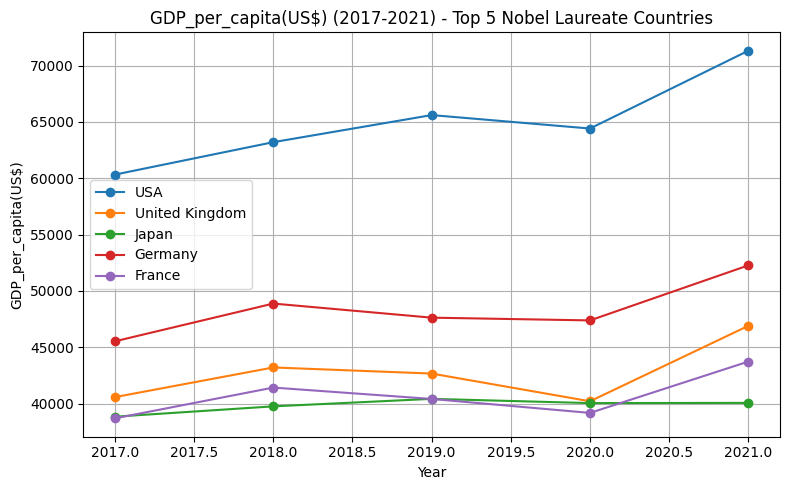

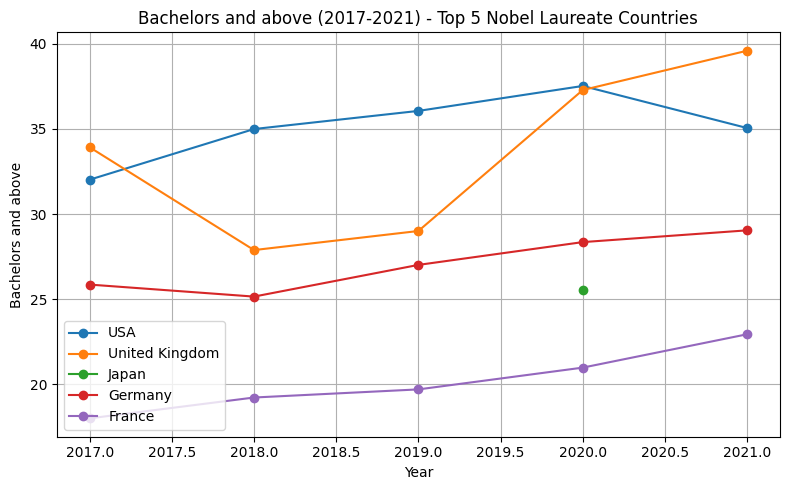

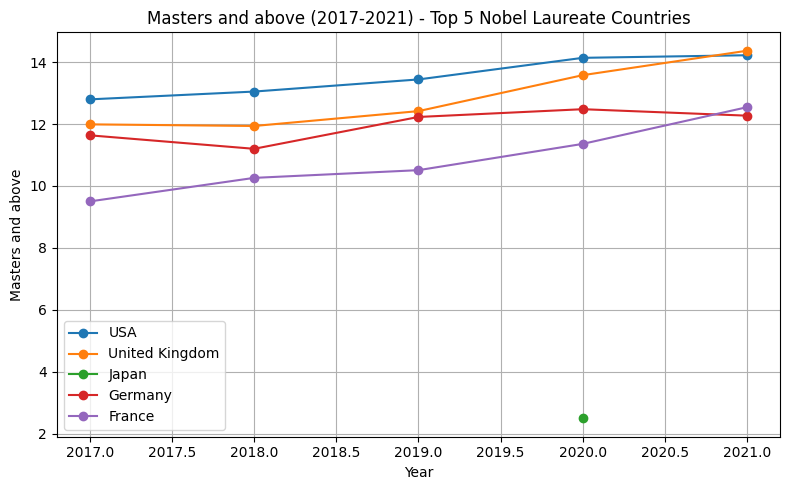

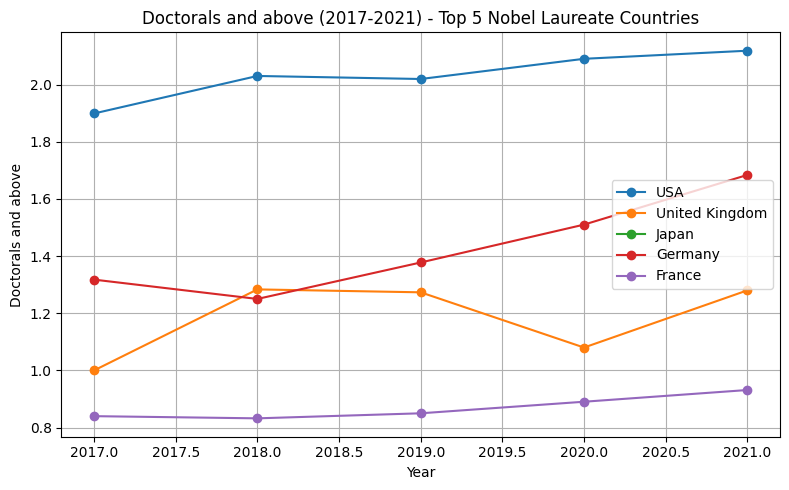

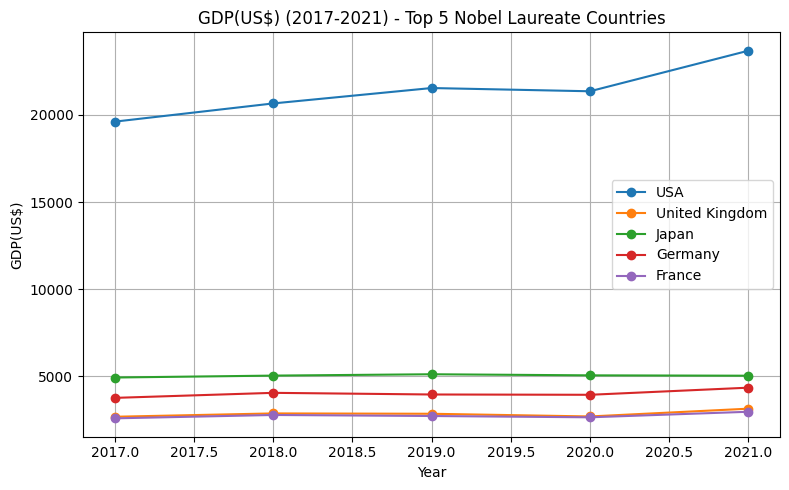

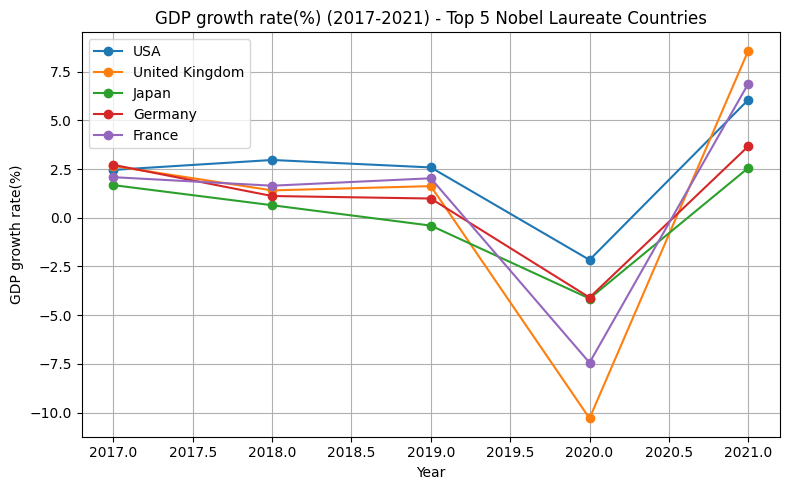

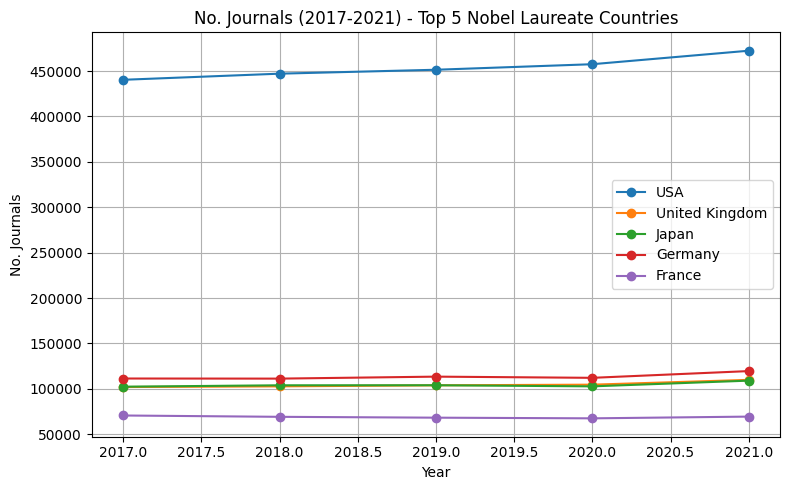

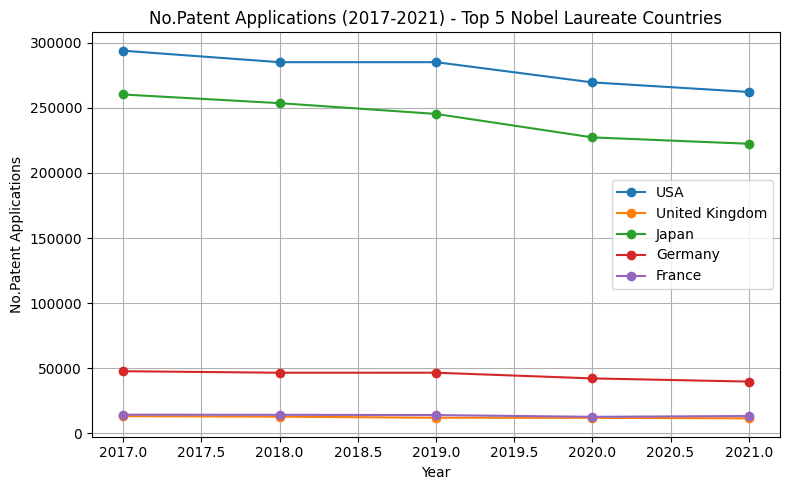

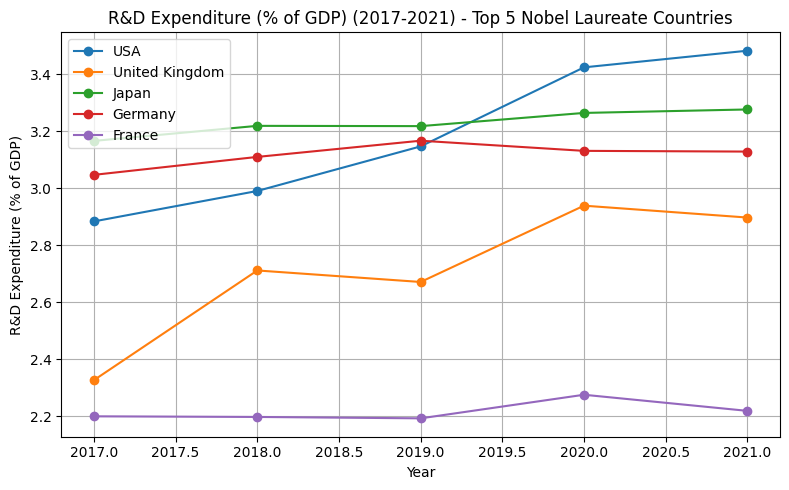

In [ ]:
import matplotlib.pyplot as plt

# 1. Get the top 5 countries by laureate count from nobel_with_hdi
top5_countries = nobel_with_hdi.sort_values('laureate_count', ascending=False).head(5)['affiliation_country'].tolist()

# 2. List of KPI columns to plot (excluding non-numeric and identifier columns)
kpi_cols = [
    'GDP_per_capita(US$)', 'Bachelors and above', 'Masters and above', 'Doctorals and above',
    'GDP(US$)', 'GDP growth rate(%)', 'No. Journals', 'No.Patent Applications', 'R&D Expenditure (% of GDP)'
]

# 3. Plot line charts for each KPI for the top 5 countries
for kpi in kpi_cols:
    plt.figure(figsize=(8,5))
    for country in top5_countries:
        country_data = filtered_merged_df17_22[filtered_merged_df17_22['Country Name'] == country]
        plt.plot(country_data['Year'], country_data[kpi], marker='o', label=country)
    plt.title(f'{kpi} (2017-2021) - Top 5 Nobel Laureate Countries')
    plt.xlabel('Year')
    plt.ylabel(kpi)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 📌 Summary of Observations – KPI Trends (2017–2021)

After analyzing trends in 9 national-level KPIs for the top 5 Nobel laureate-producing countries, we observed the following:

#### 💡 Key Insights:
- **USA** consistently outperforms others in:
  - **GDP per capita**
  - **Total GDP**
  - **R&D Expenditure**
  - **Number of Patents and Journals**
- **United Kingdom** showed a significant upward trend in:
  - **Higher education completion (Bachelor’s and Master’s)**
  - **GDP growth rebound post-2020**
- **Germany** and **Japan** demonstrate high scientific output (journals, patents) but relatively lower R&D % of GDP in comparison to the USA.
- **France**, despite lower education and patent numbers, maintained competitive GDP per capita growth and stable doctoral attainment.

#### 📊 Correlation Suggestion:
- Countries investing more in **education** and **R&D** generally tend to have **higher Nobel laureate counts**, suggesting a link between national innovation ecosystems and global scientific recognition.

These multi-KPI trend plots form the analytical backbone for answering Question 3.


### ❓ Question 4: Which Institutions Have Produced the Most Nobel Laureates (Since 2000)?

To explore the institutional landscape of Nobel Prize achievements, we grouped the recent Nobel laureates by:
- `affiliation_name`: the institution at the time of the award
- `affiliation_country`: the country where the institution is located

We then calculated the number of **unique laureates** associated with each institution.

In [ ]:
# Group by affiliation_name and affiliation_country, then count unique laureate IDs
nobel_counts_by_aff_name = (
    df_recent_filtered
    .groupby(['affiliation_name', 'affiliation_country'])['id']
    .nunique()
    .reset_index(name='laureate_count')
)

# Sort by laureate_count descending
nobel_counts_by_aff_name = nobel_counts_by_aff_name.sort_values('laureate_count', ascending=False)

# Show the result
nobel_counts_by_aff_name

,affiliation_name,affiliation_country,laureate_count
114,University of California,USA,17
41,Howard Hughes Medical Institute,USA,14
65,Massachusetts Institute of Technology (MIT),USA,13
88,Princeton University,USA,9
98,Stanford University,USA,8
...,...,...,...
52,Kitasato University,Japan,1
49,"Janelia Research Campus, Howard Hughes Medical...",USA,1
48,J.F. Clauser & Assoc.,USA,1
47,Institute for Quantum Optics and Quantum Infor...,Austria,1


### 🔍 Extension for Question 4: Linking Institutional Nobel Success with QS Global Rankings

To explore whether globally ranked universities are also responsible for producing Nobel laureates, we extended our earlier institutional analysis.

#### 🧠 Hypothesis:
> Do top-ranked institutions in the QS World University Rankings also produce more Nobel Prize winners?

---

#### 🧪 Wrangling Steps:
1. **Filtered** the `nobel_counts_by_aff_name` dataset to include only institutions with **3 or more laureates**.
2. **Manually added QS Rankings** for these universities using publicly available data from the [QS World University Rankings website](https://www.topuniversities.com/university-rankings).
   - This simulates data we could obtain via **web scraping**.


In [ ]:
# Filter nobel_counts_by_aff_name to keep only rows where laureate_count >= 3
nobel_counts_by_aff_name_filtered = nobel_counts_by_aff_name[nobel_counts_by_aff_name['laureate_count'] >2].copy()
ranks = [12, 29, 1, 22, 5, 21, 34, 4, 10, 43, 23, 416, 44, 72, 5, 108, 320, 1200, 215]
nobel_counts_by_aff_name_filtered['rank'] = ranks
nobel_counts_by_aff_name_filtered.head()

# Show the result
nobel_counts_by_aff_name_filtered

,affiliation_name,affiliation_country,laureate_count,rank
114,University of California,USA,17,12
41,Howard Hughes Medical Institute,USA,14,29
65,Massachusetts Institute of Technology (MIT),USA,13,1
88,Princeton University,USA,9,22
98,Stanford University,USA,8,5
117,University of Chicago,USA,6,21
19,Columbia University,USA,6,34
38,Harvard University,USA,6,4
12,California Institute of Technology (Caltech),USA,5,10
92,Rockefeller University,USA,4,43


### 🌍 Support for Question 4: Country-wise QS Top 50 University Distribution (2025)

To further analyze the role of national education ecosystems in producing Nobel laureates, we used the actual **QS World University Rankings 2025** dataset.

We aimed to identify:
> Which countries dominate the global top 50 universities list?

#### Steps Performed:
1. Loaded the `qs-world-rankings-2025.csv` dataset.
2. Cleaned column names by removing any leading/trailing spaces.
3. Converted the '2025 Rank' column to numeric using `pd.to_numeric()` (to handle rank ranges like '601-610').
4. Filtered the data to include only universities ranked **1–50** globally.
5. Counted how many top 50 universities each country has.

In [ ]:
import pandas as pd

# Load the QS dataset
qs = pd.read_csv("qs-world-rankings-2025.csv")

# Remove any leading/trailing spaces in column names
qs.columns = qs.columns.str.strip()

# Convert '2025 Rank' to numeric, coerce errors (for ranges like '601-610')
qs['2025 Rank Num'] = pd.to_numeric(qs['2025 Rank'], errors='coerce')

# Filter where 2025 rank <= 100
qs_top100 = qs[qs['2025 Rank Num'] <= 50]

# Group by 'Location Full' and count
result = qs_top100.groupby('Location Full').size().reset_index(name='count')

display(result)



,Location Full,count
0,Australia,6
1,Canada,3
2,China (Mainland),5
3,France,2
4,Germany,1
5,Hong Kong SAR,3
6,Japan,2
7,Netherlands,1
8,Singapore,2
9,South Korea,1


#### 📊 Final Output: Countries Ranked by Number of QS Top 50 Universities (2025)

We sorted the previously grouped data to rank countries by the number of universities they have in the QS Top 50 list.


In [ ]:
Country_Count_QS_sort = result.sort_values(by='count', ascending=False)
Country_Count_QS_sort

,Location Full,count
12,United States,16
11,United Kingdom,8
0,Australia,6
2,China (Mainland),5
1,Canada,3
5,Hong Kong SAR,3
3,France,2
6,Japan,2
8,Singapore,2
10,Switzerland,2


In [ ]:
qs

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score,2025 Rank Num
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100,1.0
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5,2.0
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9,3.0
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8,4.0
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-,NaN
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-,NaN
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-,NaN
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-,NaN


### 🧩 Final Merge: Connecting Nobel-Winning Institutions with QS University Rankings (2025)

To complete our institutional analysis, we matched universities with **3 or more Nobel laureates** to their **QS World University Rankings 2025** entry.

#### 🛠️ Data Preparation:
To ensure an accurate match despite formatting differences, we:
1. Created lowercase, whitespace-trimmed versions of both institution name columns:
   - `affiliation_name_clean` from Nobel data
   - `University_clean` from QS data

#### 🔗 Merge Step:
We then performed an inner join to retrieve:
- University name (from both sources)
- Number of laureates
- QS rank
- QS overall score


In [ ]:
# Create lowercase and stripped versions for matching
nobel_counts_by_aff_name_filtered['affiliation_name_clean'] = nobel_counts_by_aff_name_filtered['affiliation_name'].str.strip().str.lower()
qs['University_clean'] = qs['Institution Name'].str.strip().str.lower()

merged_unis = pd.merge(
    nobel_counts_by_aff_name_filtered,
    qs,
    left_on='affiliation_name_clean',
    right_on='University_clean',
    how='inner'  # or 'left' to keep all Nobel rows even if no QS match
)
merged_unis[['affiliation_name', 'laureate_count', 'rank', 'Institution Name', '2025 Rank', 'QS Overall Score']]


,affiliation_name,laureate_count,rank,Institution Name,2025 Rank,QS Overall Score
0,Massachusetts Institute of Technology (MIT),13,1,Massachusetts Institute of Technology (MIT),1,100
1,Princeton University,9,22,Princeton University,22,85.5
2,Stanford University,8,5,Stanford University,6,96.1
3,University of Chicago,6,21,University of Chicago,21,86.2
4,Columbia University,6,34,Columbia University,34,82
5,Harvard University,6,4,Harvard University,4,96.8
6,California Institute of Technology (Caltech),5,10,California Institute of Technology (Caltech),10,90.9
7,Yale University,4,23,Yale University,23,85.2
8,Technion - Israel Institute of Technology,3,416,Technion - Israel Institute of Technology,416,28.6
9,Nagoya University,3,1200,Nagoya University,152,51.9


### 📊 Visualizing the Relationship: QS Ranking vs Nobel Impact

To visually explore the connection between a university’s **global academic prestige** and its **research impact (via Nobel laureates)**, we created a scatter plot comparing:

- **QS 2025 Rank** (academic reputation)
- **Nobel Rank** (based on number of laureates)

#### Interpretation Notes:
- Both axes are **inverted** to reflect ranking logic (lower is better).
- Each dot represents a university that appears in both datasets.

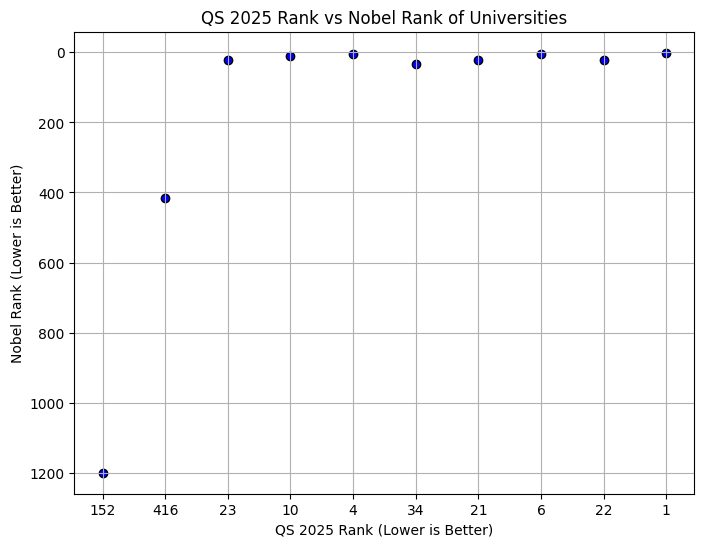

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(merged_unis['2025 Rank'], merged_unis['rank'], c='blue', edgecolor='black')
plt.title('QS 2025 Rank vs Nobel Rank of Universities')
plt.xlabel('QS 2025 Rank (Lower is Better)')
plt.ylabel('Nobel Rank (Lower is Better)')
plt.gca().invert_xaxis()  # Optional: Better rank on the left
plt.gca().invert_yaxis()  # Optional: Better Nobel rank on the top
plt.grid(True)
plt.show()


#### 🧠 Interpretation of QS Score vs Nobel Laureate Count

The scatter plot above visualizes the relationship between a university’s **QS Overall Score (2025)** and its **Nobel laureate count (2001–2021)**.

Key insights include:

- 🟢 **No strong linear trend** is observed between QS scores and Nobel laureate count. While high QS scores (90+) do appear among institutions with many laureates, the relationship is not consistent across all points.
- 🟢 Several universities with **moderate QS scores** (e.g., 70–80) still show notable Nobel activity, suggesting other contributing factors like institutional legacy, funding for research, or a focus on basic sciences.
- 🟢 Conversely, some top QS scorers have **fewer laureates**, highlighting that QS rankings — which emphasize teaching, employability, and internationalization — may not perfectly reflect a university’s research impact in terms of Nobel Prizes.

📌 **Conclusion:**  
QS Overall Score offers valuable context about university reputation and resources, but it **cannot be used as a standalone predictor** for Nobel research output. It is best interpreted alongside more direct indicators like research funding, publication impact, and historical laureate legacy.


### 📊 QS Score vs Number of Nobel Laureates

To further investigate the institutional dynamics behind Nobel recognition, we visualized the relationship between a university’s:

- **QS Overall Score (2025)** — which reflects teaching, research, reputation, and international impact  
- **Nobel Laureate Count (2001–2021)** — from our filtered and wrangled Nobel dataset

This chart helps determine whether a university’s academic performance score (as per QS) aligns with actual Nobel Prize outcomes.


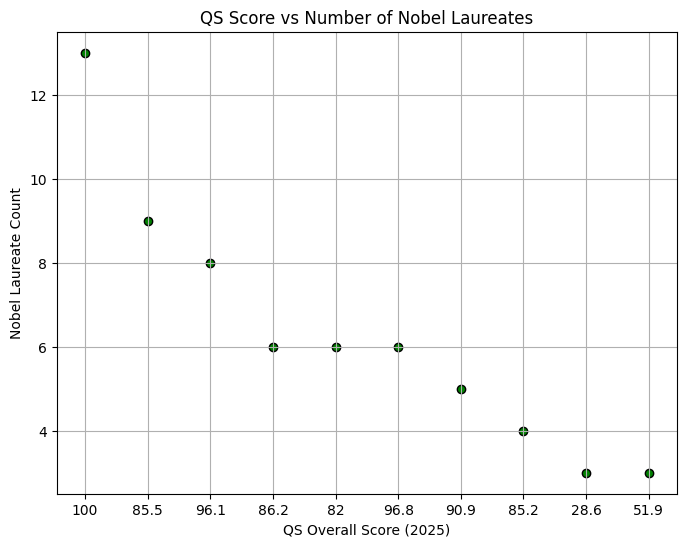

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(merged_unis['QS Overall Score'], merged_unis['laureate_count'], color='green', edgecolor='black')
plt.title('QS Score vs Number of Nobel Laureates')
plt.xlabel('QS Overall Score (2025)')
plt.ylabel('Nobel Laureate Count')
plt.grid(True)
plt.show()


#### 🧠 Interpretation of QS Score vs Nobel Laureate Count

The scatter plot above shows how a university’s **QS Overall Score (2025)** relates to the number of Nobel laureates it has produced (2001–2021).

##### Key Takeaways:

- 🎓 Universities with **higher QS scores (90–100)** generally have **more Nobel laureates**, indicating a possible connection between institutional prestige and Nobel productivity.
- 🟢 The top performers (e.g., institutions scoring near 100) tend to cluster around the **highest Nobel counts**, suggesting that elite universities also serve as hubs for high-impact research.
- 🔍 However, the trend is **not strictly linear**:
  - Some institutions with **moderate QS scores** (e.g., 85–90) still perform strongly in Nobel production.
  - A few institutions with **low QS scores (below 60)** still appear with 3–4 laureates, showing that research excellence can sometimes exist outside global QS visibility.

##### 🎯 Conclusion:
While a strong QS score often coincides with Nobel success, it is **not the sole indicator**. Historical legacy, niche research excellence, funding, and institutional mission also play critical roles in fostering Nobel-worthy outcomes.


### ❓ Q1. Which national innovation indicators are most strongly associated with Nobel Prize productivity across countries?

To explore this question, we examined how various innovation-related KPIs correlate with the number of Nobel laureates per country.

---

#### 🧪 Method:
1. Calculated the **average value (2017–2021)** for each KPI per country.
2. Merged this with the **Nobel laureate count** per country.
3. Created a **correlation matrix** to assess the relationship between each KPI and the `laureate_count`.
4. Visualized the correlations using a **Seaborn heatmap**.
5. Highlighted the most strongly correlated indicators using a filter (absolute correlation ≥ 0.4).



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


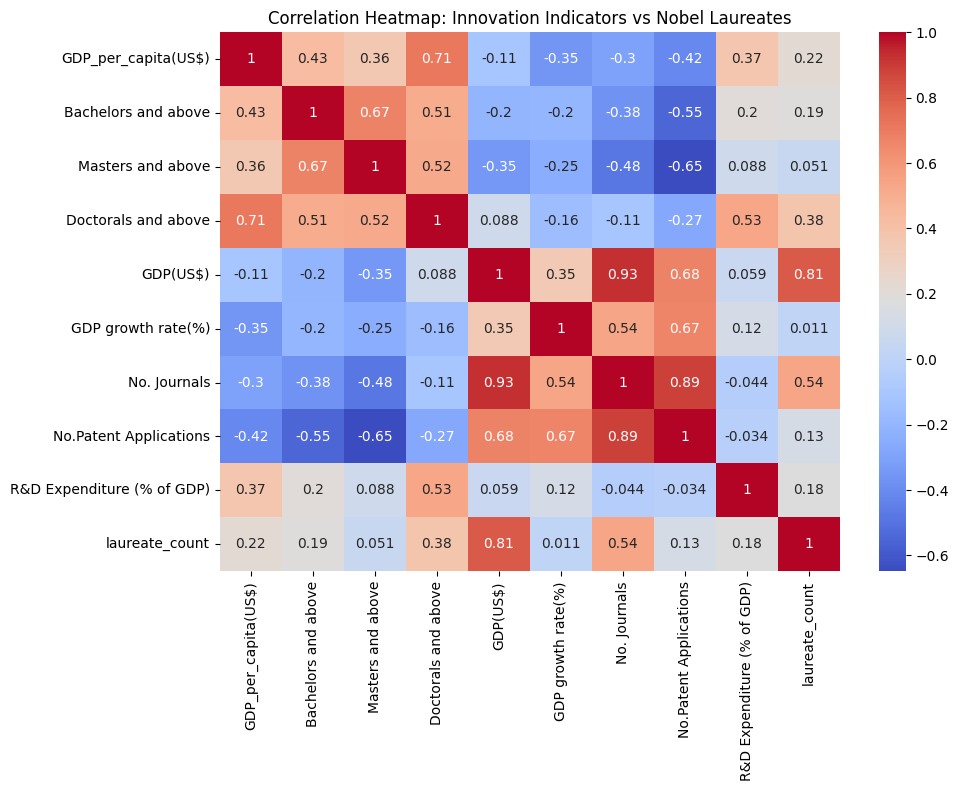

🔍 Features highly correlated with Nobel laureate count:

GDP(US$)        0.809799
No. Journals    0.541441
Name: laureate_count, dtype: float64


In [ ]:
!pip3 install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Example: group and merge first
avg_kpis = filtered_merged_df17_22.groupby('Country Name')[[
    'GDP_per_capita(US$)', 'Bachelors and above', 'Masters and above', 'Doctorals and above',
    'GDP(US$)', 'GDP growth rate(%)', 'No. Journals', 'No.Patent Applications', 'R&D Expenditure (% of GDP)'
]].mean()

# Merge with laureate counts
kpi_corr_df = avg_kpis.merge(nobel_counts_by_country, left_index=True, right_on='affiliation_country')
corr_matrix = kpi_corr_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Innovation Indicators vs Nobel Laureates')
plt.show()

# Extract correlations with laureate_count
laureate_corr = corr_matrix['laureate_count'].drop('laureate_count')

# Filter for high correlations (>= 0.5 or <= -0.5)
high_corr = laureate_corr[laureate_corr.abs() >= 0.4].sort_values(ascending=False)


print("🔍 Features highly correlated with Nobel laureate count:\n")
print(high_corr)



#### 🧠 Interpretation of Correlation Heatmap: Innovation Indicators vs Nobel Laureates

The heatmap above shows the Pearson correlation between various national innovation indicators and the number of Nobel laureates per country (2001–2021).

##### 🔍 Key Findings:

- 📌 **GDP (US$)** has the **strongest positive correlation** with `laureate_count` at **0.81** — suggesting that economically powerful countries tend to produce more Nobel winners.
- 📌 **GDP growth rate (%)** and **number of journals** also show moderately strong correlations (**0.54** each), indicating that countries with growing economies and high research output are more likely to produce Nobel-caliber work.
- 📌 **Doctorals and above** (PhD attainment) shows a moderate correlation (**0.38**), highlighting the role of higher education depth in scientific achievement.
- 📉 **Education-based indicators** such as "Masters and above" and "Bachelors and above" have **lower or even negative correlations** with Nobel counts — implying that mass education is less strongly tied to Nobel outcomes compared to elite research.
- 📉 Surprisingly, **patent applications** show a **very weak correlation** (**0.13**) with Nobel production — despite being a common innovation metric.

##### 🎯 Conclusion:
Overall, Nobel Prize productivity appears to be **most strongly associated with national economic power (GDP)** and **research infrastructure (journals, doctoral output)** rather than broad education levels or patent filings. These insights can guide policymakers toward high-impact investments in scientific innovation.


### ❓ Q2: Which countries demonstrate consistent investment in education and R&D, and how does this relate to their Nobel laureate output?

To explore this question, we analyzed national investment in education and R&D over the 2017–2021 period and compared it with Nobel laureate counts.

#### 🧪 Methodology:
1. Calculated the **average educational attainment** (Bachelor’s, Master’s, Doctoral levels) and **R&D Expenditure (% of GDP)** for each country across five years.
2. Merged the result with `nobel_counts_by_country` to associate investment metrics with Nobel laureate output.
3. Sorted the countries by `laureate_count` to identify the **top 10 Nobel-producing nations** and examine their innovation investments.


In [ ]:
avg_investment = filtered_merged_df17_22.groupby('Country Name')[[
    'Bachelors and above', 'Masters and above', 'Doctorals and above', 'R&D Expenditure (% of GDP)'
]].mean().reset_index()
education_rnd_nobel = avg_investment.merge(nobel_counts_by_country, left_on='Country Name', right_on='affiliation_country')
# Sort and keep top 10
top10 = education_rnd_nobel.sort_values('laureate_count', ascending=False).head(10)



### 📊 Visualizing Nobel Laureate Output vs R&D Investment (% of GDP)

To support our Q2 analysis, we created a scatter plot comparing each country’s:

- **R&D Expenditure (% of GDP)**  
- **Nobel Laureate Count (2001–2021)**

#### Key Visualization Features:
- Each point represents one country.
- We used annotations to highlight seven key innovation-driven nations with high Nobel impact and significant R&D investment.


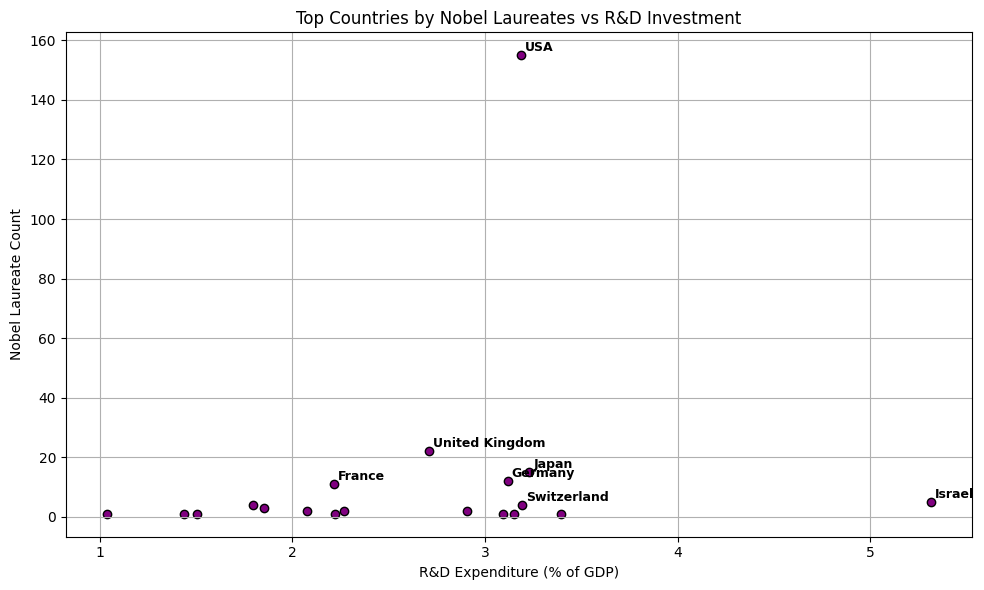

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(
    education_rnd_nobel['R&D Expenditure (% of GDP)'],
    education_rnd_nobel['laureate_count'],
    color='purple',
    edgecolor='black'
)

# Label only top 7 countries
highlight = ['USA', 'United Kingdom', 'Germany', 'France', 'Switzerland', 'Japan', 'Israel']
for i, row in education_rnd_nobel.iterrows():
    if row['Country Name'] in highlight:
        plt.annotate(row['Country Name'],
                     (row['R&D Expenditure (% of GDP)'], row['laureate_count']),
                     textcoords="offset points",
                     xytext=(3,3),
                     ha='left',
                     fontsize=9,
                     fontweight='bold')

plt.xlabel('R&D Expenditure (% of GDP)')
plt.ylabel('Nobel Laureate Count')
plt.title('Top Countries by Nobel Laureates vs R&D Investment')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 🧠 Interpretation of R&D Investment vs Nobel Laureate Count

This scatter plot visualizes the relationship between a country’s **average R&D expenditure (% of GDP)** and its **total Nobel laureate count** from 2001 to 2021.

##### 🔍 Key Insights:

- 🇺🇸 **USA** is a clear outlier, with **the highest number of Nobel laureates** and a strong R&D investment above 3% of GDP.
- 🇬🇧 **United Kingdom**, 🇩🇪 **Germany**, 🇯🇵 **Japan**, and 🇨🇭 **Switzerland** cluster together with solid R&D investment (2.5–3.5%) and consistently high Nobel output.
- 🇫🇷 **France** and 🇮🇱 **Israel** perform **better than expected** given their smaller size or unique economic profile — with Israel showing one of the **highest R&D % levels**.
- Countries with **lower R&D expenditure** (below ~2%) tend to have **fewer Nobel laureates**, reinforcing the idea that sustained investment in research is a key driver of innovation success.

##### 🎯 Conclusion:

> Countries that consistently allocate **higher portions of their GDP to R&D** tend to produce **significantly more Nobel laureates**, underscoring the importance of long-term investment in innovation and science.


### ❓ Q3: Do top-ranked universities in the QS World Rankings also tend to produce more Nobel Laureates?

To answer this, we merged the Nobel-winning institutions with the **QS World University Rankings 2025**, then analyzed their “Nobel productivity” relative to their QS rank.

---

#### 🧪 Methodology:
1. Converted QS ranks to numeric values to handle range-based ranks like "601-610".
2. Filtered to include only the **top 100 globally ranked universities**.
3. Created a new metric:  
   📊 `laureate_per_rank = laureate_count / QS Rank`  
   This adjusts Nobel counts based on how high each university is ranked — giving a better sense of **impact efficiency**.
4. Sorted the universities based on this metric.
5. Visualized the **top 15 universities** by this adjusted Nobel productivity.


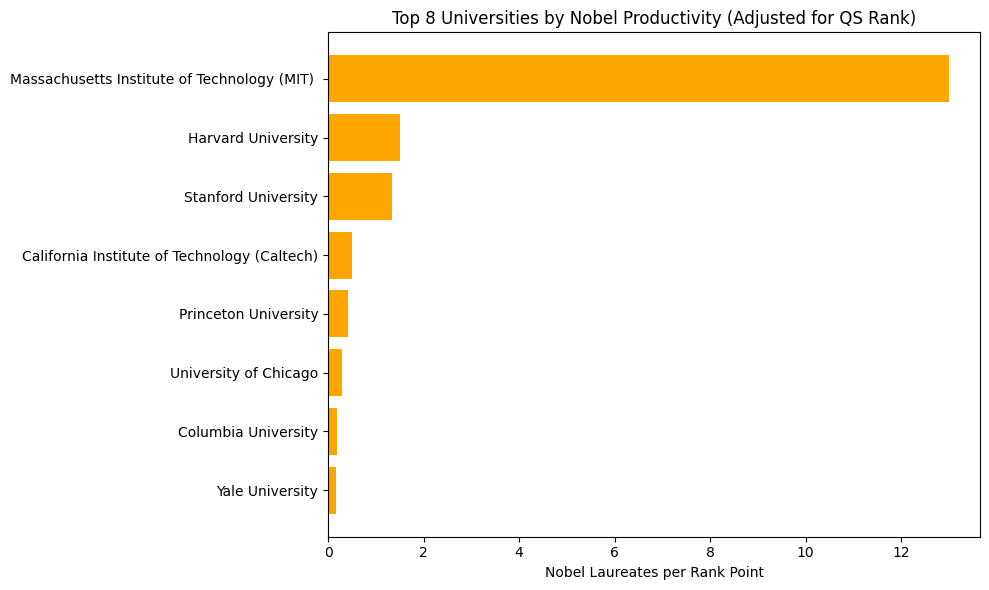

In [ ]:
merged_unis['2025 Rank'] = pd.to_numeric(merged_unis['2025 Rank'], errors='coerce')

# Filter top 100 universities
top100 = merged_unis[merged_unis['2025 Rank'] <= 100].copy()

# Create new metric
top100['laureate_per_rank'] = top100['laureate_count'] / top100['2025 Rank']

# Sort by efficiency
top100_sorted = top100.sort_values('laureate_per_rank', ascending=False)

# Plot
plt.figure(figsize=(10,6))
top15 = top100_sorted.head(15)
plt.barh(top15['Institution Name'], top15['laureate_per_rank'], color='orange')
plt.xlabel('Nobel Laureates per Rank Point')
plt.title('Top 8 Universities by Nobel Productivity (Adjusted for QS Rank)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### 🧠 Interpretation: Adjusted Nobel Productivity vs QS Ranking

This bar chart visualizes the **top 8 universities** in terms of **Nobel laureates per QS rank point** — a custom metric we created to reflect **research productivity adjusted for academic ranking**.

##### 🔍 Key Insights:

- 🥇 **MIT (Massachusetts Institute of Technology)** overwhelmingly leads with the highest Nobel productivity per rank point, indicating exceptional research output relative to its global QS position.
- 🧠 **Harvard**, **Stanford**, and **Caltech** also demonstrate extremely strong performance, blending both academic prestige and consistent Nobel success.
- 🧪 Other elite institutions like **Princeton**, **University of Chicago**, **Columbia**, and **Yale** round out the list, showing that **US universities dominate the Nobel landscape** when adjusted for rank.

##### 🎯 Conclusion for Q3:
> Top-ranked universities in the QS World Rankings **do tend to produce more Nobel laureates**, but when adjusted for rank, certain institutions like **MIT and Caltech** stand out for their **research efficiency**. This metric offers a deeper, more balanced way to compare global academic performance.


## 🔍 WEB SCRAPPING

## 🔍 Q4: What are the most common research areas or fields of study among recent Nobel laureates?

### ⚠️ Limitation:
Our combined dataset includes details such as the laureate's name, award category, and affiliation but **does not include specific research areas, disciplines, or keywords** associated with their Nobel-winning work.

Without this, we are unable to answer:
> “Which research domains (e.g., quantum physics, molecular biology, behavioral economics) most often lead to Nobel Prizes?”

---

### 🌐 Proposed Web Scraping Solution:

To address this limitation, we can **scrape external websites** such as university profile pages, Nobel Prize laureate biographies, or research ranking portals to extract fields of expertise.


In [ ]:
import requests
%pip install beautifulsoup4

from bs4 import BeautifulSoup

url = 'https://www.topuniversities.com/universities/university-of-california-los-angeles-ucla'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

# Extracting ranking scores
scores = {}
for item in soup.find_all('div', class_='ranking-criteria'):
    label = item.find('div', class_='title').text.strip()
    value = item.find('div', class_='value').text.strip()
    scores[label] = value

print(scores)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
{}
